# k-NN

by Kirill Bykov, Oleg Vlasovets, Ilya

In [1]:
#imports
import pandas as pd #pandas for reading csv file
import numpy as np  #numpy for vectorising
import seaborn as sns
from scipy.spatial import distance_matrix
from tqdm import tqdm
import math
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import multiprocessing as mp
from sklearn.metrics import pairwise_distances
%matplotlib inline

In [2]:
def read_MNIST(file_path):
    df = pd.read_csv(file_path, header = None)
    Y = np.array(df[0])
    X = np.array(df.iloc[:,1:])
    return X, Y

def distance(A, B, metric = "euclidean"):
    if metric == "euclidean":
        return np.linalg.norm(A-B)

def first_most_frequent(arr):
    c = 0
    num = arr[0]
    for i in arr:
        amount_times = arr.count(i)
        if amount_times > c:
            c = amount_times
            num = i
    return num

def accuracy(Y_pred, Y_true):
    return np.mean(1 - np.equal(Y_true, Y_pred, dtype=int))

def NN_calculation(X_train, chunk_size, partition, p, k, chunk_num):
    NN_local = []
    X_partition = X_train[chunk_size*chunk_num:chunk_size*(chunk_num+1)]
    n_partition = len(X_partition)
    for i in range(math.trunc(n_partition/partition)):
#         NN = distance_matrix(X_partition[partition*i:partition*(i+1)], X_train, p).argsort()[1:k+1]
        NN = [[]]
        NN_local.append(NN)
        q = (i/partition)*100
        print(i)
    return NN_local

In [8]:
class kNN:
    
    def __init__(self, X_train, Y_train, p = 2):
        self.X_train = X_train/255.
        self.Y_train = Y_train
        self.length = len(X_train)
        self.p = p
        self.inner_distances_calculated = False
        
    def set_minkovsky_parameter(self, p):
        self.p = p
        self.inner_distances_calculated = False
        
    def vote(self, NN):
        n = len(NN)
        votes = np.zeros(n).astype(int)
        for i in range(0, n):
            votes[i] = first_most_frequent([self.Y_train[j] for j in NN[i]])
        return votes
    
    def predict(self, X_test, k):
        X_test = X_test/255.
        n_test = len(X_test)
        D = np.zeros((n_test, self.length))
        NN = np.zeros((n_test,k)).astype(int)
#         D = distance_matrix(X_test, self.X_train, self.p)
        D = pairwise_distances(X_test, self.X_train, n_jobs = -1, metric = "minkowski",
                                       p = self.p)
        for i in range(0, n_test):
            NN[i] = D[i].argsort()[:k]
        return self.vote(NN)
    
    def LOOCV(self, k):
        if not self.inner_distances_calculated:
            print("Calculating distances. This could take some time ...")
#             self.inner_distances = distance_matrix(self.X_train, self.X_train, self.p);
            self.inner_distances = pairwise_distances(self.X_train, self.X_train, n_jobs = -1, metric = "minkowski",
                                       p = self.p)
            self.inner_NN = np.zeros((self.length,self.length)).astype(int)
            for i in range(0,self.length):
                self.inner_NN[i] = self.inner_distances[i].argsort()
            self.inner_distances_calculated = True

        return self.vote(self.inner_NN[:,1:k+1])
    
#     def LOOCV_big(self, k):
#         if not self.inner_distances_calculated or self.inner_NN.shape[1]<k:
#             print("Calculating distances. This could take some time ...")
#             self.inner_NN = []
#             for i in tqdm(range(self.length)):
#                 D = distance_matrix([self.X_train[i]], self.X_train, self.p);
#                 NN = D[0].argsort()[1:k+1]
#                 self.inner_NN.append(NN)
#             self.inner_NN = np.array(self.inner_NN)
        
#         return self.vote(self.inner_NN[:,:k])

    def LOOCV_big(self, k, partition = 500):
        if not self.inner_distances_calculated or self.inner_NN.shape[1]<k:
            print("Calculating distances. This could take some time ...")
            self.inner_NN = []
            for i in tqdm(range(math.trunc(self.length/partition))):
                D = pairwise_distances(self.X_train[partition*i:partition*(i+1)], self.X_train,n_jobs = -1, metric = "minkowski",
                                       p = self.p)
                for i in range(partition):
                    self.inner_NN.append(D[i].argsort()[1:k+1])
            self.inner_NN = np.array(self.inner_NN)
            self.inner_distances_calculated = True
        return self.vote(self.inner_NN[:,:k])
    
#     def __NN_calculation(X_train, chunk_size, partition, p, k, chunk_num):
#         NN_local = []
#         X_partition = X_train[chunk_size*chunk_num:chunk_size*(chunk_num+1)]
#         n_partition = len(X_partition)
#         for i in range(math.trunc(n_partition/partition)):
#             NN = distance_matrix(X_partition[partition*i:partition*(i+1)], X_train, p).argsort()[1:k+1]
#             NN_local.append(NN)
#             q = (i/partition)*100
#             if q // 2:
#                 print("Process is "+ q+"% finished")
#         return NN_local
    
#     def LOOCV_big_parallel(self, k):
#         if not self.inner_distances_calculated or self.inner_NN.shape[1]<k:
#             print("Calculating distances. This could take some time ...")
#             self.inner_NN = []
#             partition = 50
#             threads = 10
#             chunk_size = self.length//threads
            
#             pool = mp.Pool(processes=threads)
#             results = [pool.apply(NN_calculation, args=(X_train, chunk_size, partition, self.p, k, chunk_num, ))
#                        for chunk_num in range(threads)]        
#         return results

### a)






  0%|          | 0/20 [00:00<?, ?it/s]





  0%|          | 0/6 [00:00<?, ?it/s]

Calculating distances. This could take some time ...








 17%|█▋        | 1/6 [00:05<00:27,  5.50s/it]





 33%|███▎      | 2/6 [00:10<00:21,  5.44s/it]





 50%|█████     | 3/6 [00:16<00:16,  5.38s/it]





 67%|██████▋   | 4/6 [00:21<00:10,  5.29s/it]





 83%|████████▎ | 5/6 [00:26<00:05,  5.27s/it]





100%|██████████| 6/6 [00:31<00:00,  5.25s/it]










  5%|▌         | 1/20 [00:31<10:00, 31.61s/it]




 20%|██        | 4/20 [00:31<05:54, 22.14s/it]




 40%|████      | 8/20 [00:31<03:06, 15.50s/it]




 65%|██████▌   | 13/20 [00:31<01:16, 10.86s/it]




100%|██████████| 20/20 [00:32<00:00,  1.60s/it]

Text(0, 0.5, 'Accuracy')

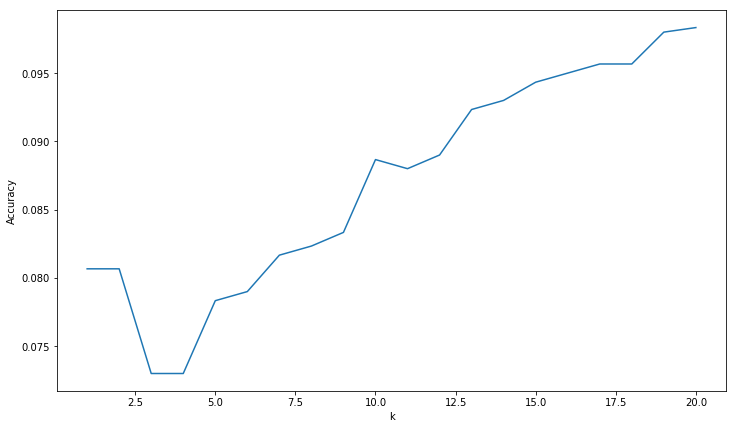

In [13]:
fig, ax = plt.subplots(figsize=(12,7))

LOOCV_big_results = []
X_train, Y_train = read_MNIST("data/MNIST_train_small.csv")
classifier = kNN(X_train, Y_train)

for k in tqdm(range(20,0,-1)):
    Y_pred = classifier.LOOCV_big(k)
    LOOCV_big_results.append(accuracy(Y_pred, Y_train))
    
ax = sns.lineplot(x=[i for i in range(1,21)], y=LOOCV_big_results[::-1])
plt.xlabel('k')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

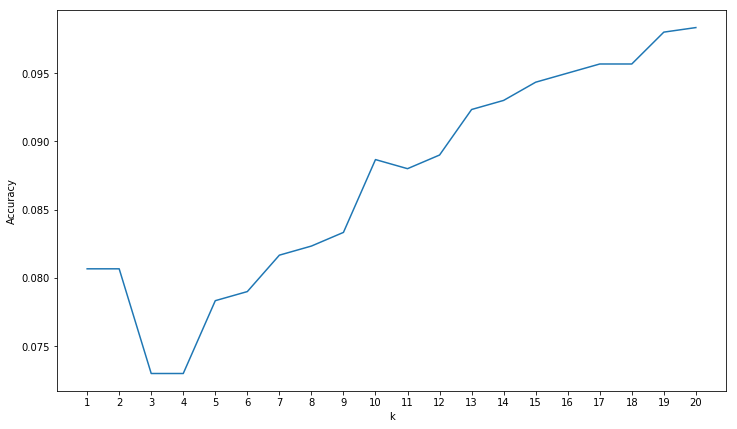

In [15]:
fig, ax = plt.subplots(figsize=(12,7))

ax = sns.lineplot(x=[i for i in range(1,21)], y=LOOCV_big_results[::-1])
plt.xticks([i for i in range(1,21)])
plt.xlabel('k')
plt.ylabel('Loss')